In [1]:
import pandas as pd

file_path = 'nyc_temperature.csv'

nyc_weather_data = pd.read_csv(file_path)
nyc_weather_data.replace('T', 0, inplace=True)

nyc_weather_data.head()

,date,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
0,1/1/19,60,40,50.0,13.9,15,0,0.08,0,0
1,2/1/19,41,35,38.0,2.1,27,0,0,0,0
2,3/1/19,45,39,42.0,6.3,23,0,0,0,0
3,4/1/19,47,37,42.0,6.5,23,0,0,0,0
4,5/1/19,47,42,44.5,9.1,20,0,0.45,0,0


In [2]:
pip install prophet

In [3]:
# Convert 'date' to datetime and prepare the dataframe
nyc_weather_data['date'] = pd.to_datetime(nyc_weather_data['date'], format='%d/%m/%y')
prophet_df = nyc_weather_data[['date', 'HDD']].copy()
prophet_df.rename(columns={'date': 'ds', 'HDD': 'y'}, inplace=True)

In [4]:
from prophet import Prophet

model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j96mhgx/77gd8bx9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j96mhgx/msl960d_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14228', 'data', 'file=/tmp/tmp5j96mhgx/77gd8bx9.json', 'init=/tmp/tmp5j96mhgx/msl960d_.json', 'output', 'file=/tmp/tmp5j96mhgx/prophet_modelhv_i86mx/prophet_model-20240105165336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:53:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:53:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
# For example, forecasting for the next 365 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

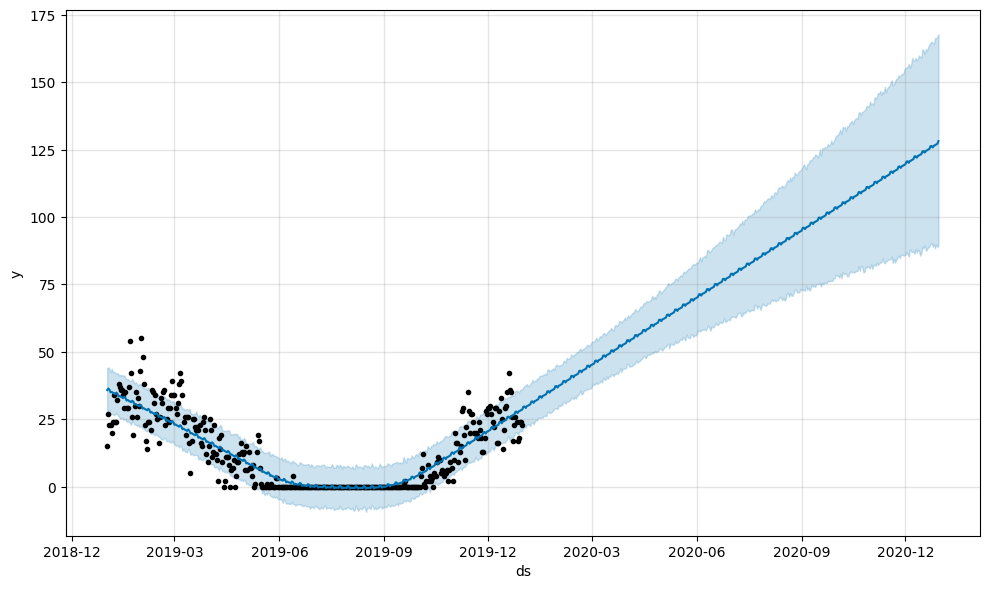

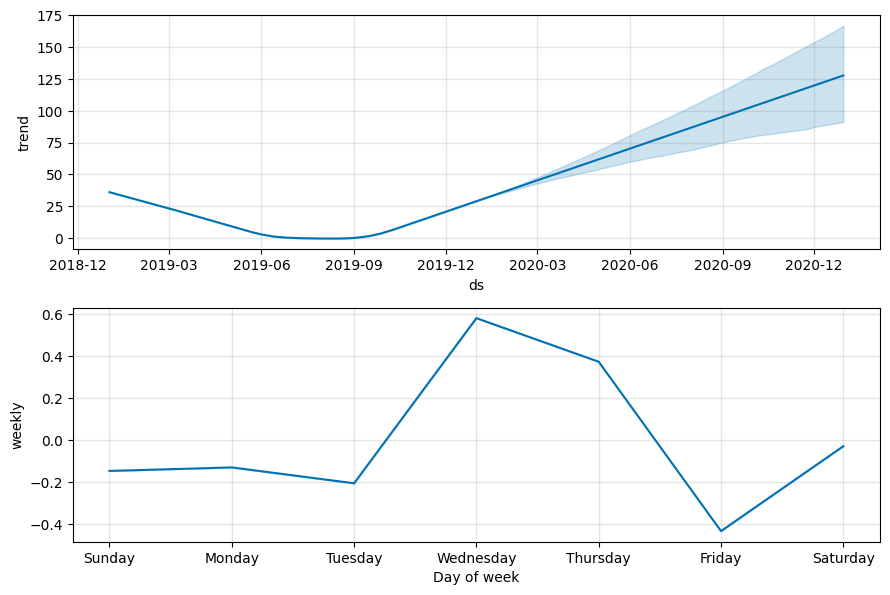

In [6]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

Not enough data on this dataset, let's try a bigger one

In [7]:
# New dataset containing data since the 1800s (https://www.kaggle.com/datasets/danbraswell/new-york-city-weather-18692022)
new_file_path = 'NYC_Central_Park_weather.csv'
nyc_new_weather_data = pd.read_csv(new_file_path)
nyc_new_weather_data.replace('T', 0, inplace=True)
nyc_new_weather_data['DATE'] = pd.to_datetime(nyc_new_weather_data['DATE'])

# Sort the data by the 'DATE' column in ascending order
nyc_new_weather_data.sort_values(by='DATE', inplace=True)
# Display the first few rows of the new dataset to understand its structure
nyc_new_weather_data.head()

,DATE,PRCP,SNOW,SNWD,TMIN,TMAX
0,1869-01-01,0.75,9.0,NaN,19.0,29.0
1,1869-01-02,0.03,0.0,NaN,21.0,27.0
2,1869-01-03,0.00,0.0,NaN,27.0,35.0
3,1869-01-04,0.18,0.0,NaN,34.0,37.0
4,1869-01-05,0.05,0.0,NaN,37.0,43.0


In [8]:
prophet_df = nyc_new_weather_data[['DATE', 'TMAX']].copy()
prophet_df.rename(columns={'DATE': 'ds', 'TMAX': 'y'}, inplace=True)


In [9]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j96mhgx/jwi4sfz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j96mhgx/pmipvwh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15644', 'data', 'file=/tmp/tmp5j96mhgx/jwi4sfz8.json', 'init=/tmp/tmp5j96mhgx/pmipvwh0.json', 'output', 'file=/tmp/tmp5j96mhgx/prophet_modela9gkjb3m/prophet_model-20240105165347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:53:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:54:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=365*10)  # for example, forecasting 1 year into the future
forecast = model.predict(future)

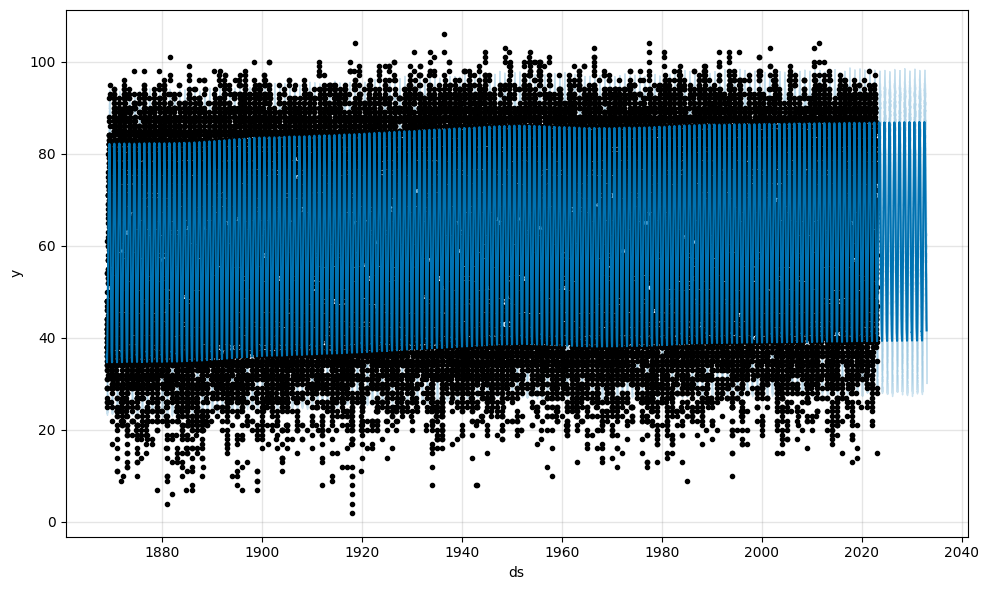

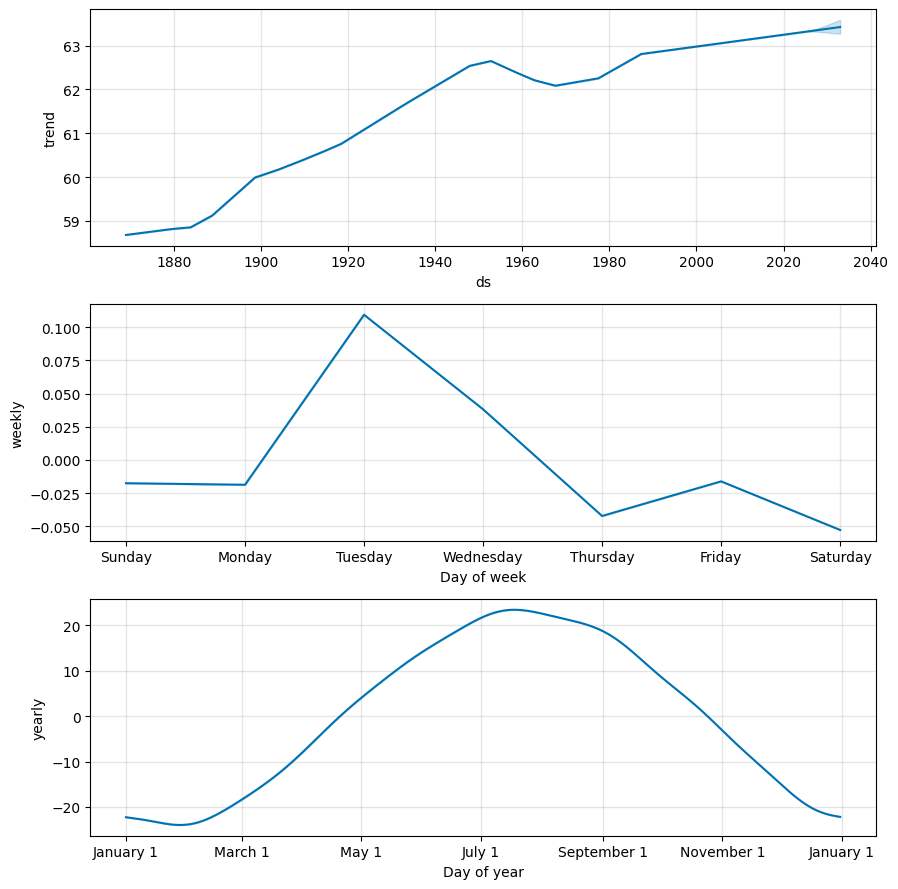

In [11]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

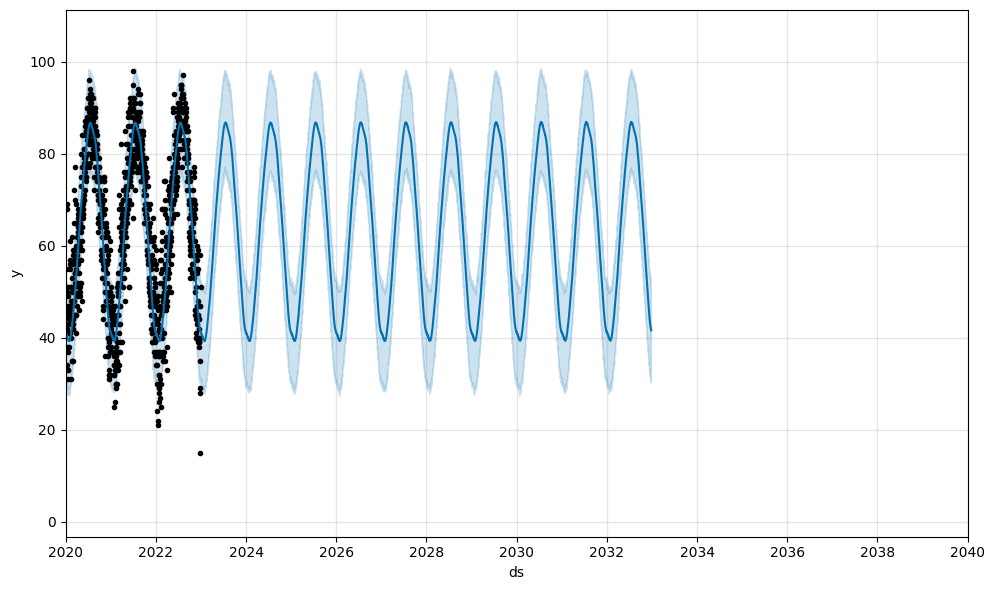

In [12]:
import matplotlib.pyplot as plt

# Create the plot
fig1 = model.plot(forecast)

# Convert string dates to datetime objects
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2040-01-01')

# Adjust the x-axis to display data from 2020 to 2040
plt.xlim(start_date, end_date)

# Show the plot
plt.show()

Seems much better. Let's check the performance.

In [15]:
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

# Perform cross-validation
# Here, 'period' is the spacing between cutoff dates
# 'horizon' is the forecast horizon
# 'initial' is the training period size
df_cv = cross_validation(model, initial='1095 days', period='365 days', horizon = '30 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)

# Display the performance metrics
print(df_p.head())

INFO:prophet:Making 152 forecasts with cutoffs between 1872-01-05 00:00:00 and 2022-11-29 00:00:00


  0%|          | 0/152 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j96mhgx/4y2id44o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j96mhgx/41b72yxk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66994', 'data', 'file=/tmp/tmp5j96mhgx/4y2id44o.json', 'init=/tmp/tmp5j96mhgx/41b72yxk.json', 'output', 'file=/tmp/tmp5j96mhgx/prophet_modeldbf2qkl3/prophet_model-20240105180559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:05:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:05:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j96mhgx/i6u0338p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j96mhgx/f5t922ht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon         mse       rmse       mae      mape     mdape     smape  \
0  3 days   96.525488   9.824739  7.969927  0.228281  0.158723  0.200986   
1  4 days   94.728263   9.732845  7.878404  0.232091  0.157688  0.201878   
2  5 days   93.661914   9.677909  7.656884  0.265572  0.151798  0.198735   
3  6 days  102.375930  10.118099  7.978829  0.285465  0.160635  0.208735   
4  7 days  104.375625  10.216439  7.986849  0.287473  0.160504  0.209752   

   coverage  
0  0.719298  
1  0.717105  
2  0.732456  
3  0.714912  
4  0.712719  


In [16]:
# Display the performance metrics
print(df_p.head())

  horizon         mse       rmse       mae      mape     mdape     smape  \
0  3 days   96.525488   9.824739  7.969927  0.228281  0.158723  0.200986   
1  4 days   94.728263   9.732845  7.878404  0.232091  0.157688  0.201878   
2  5 days   93.661914   9.677909  7.656884  0.265572  0.151798  0.198735   
3  6 days  102.375930  10.118099  7.978829  0.285465  0.160635  0.208735   
4  7 days  104.375625  10.216439  7.986849  0.287473  0.160504  0.209752   

   coverage  
0  0.719298  
1  0.717105  
2  0.732456  
3  0.714912  
4  0.712719  


Coverage is around 70%